In [1]:
import os
import pandas as pd

table = {}
for file in ['./data/raw/common_player_info.csv', './data/raw/draft_combine_stats.csv', './data/raw/draft_history.csv', './data/raw/game.csv', './data/raw/game_info.csv', './data/raw/game_summary.csv', './data/raw/inactive_players.csv', './data/raw/line_score.csv', './data/raw/officials.csv', './data/raw/other_stats.csv', './data/raw/player.csv', './data/raw/team.csv']:
    filename = os.path.splitext(os.path.basename(file))[0] 
    table[filename] = pd.read_csv(file)





In [3]:
print(table['common_player_info'])

      person_id first_name     last_name   display_first_last  \
0         76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1         76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
2          1505      Tariq   Abdul-Wahad    Tariq Abdul-Wahad   
3           949    Shareef   Abdur-Rahim  Shareef Abdur-Rahim   
4         76005        Tom     Abernethy        Tom Abernethy   
...         ...        ...           ...                  ...   
4166    1627835       Paul        Zipser          Paul Zipser   
4167    1627790       Ante         Zizic           Ante Zizic   
4168      78647        Jim          Zoet             Jim Zoet   
4169    1627826      Ivica         Zubac          Ivica Zubac   
4170      78650       Matt         Zunic           Matt Zunic   

     display_last_comma_first  display_fi_last          player_slug  \
0             Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby   
1        Abdul-Jabbar, Kareem  K. Abdul-Jabbar  kareem-abdul-jabbar   
2     

In [6]:
for t in table:
    print(t,":",table[t].columns)

common_player_info : Index(['person_id', 'first_name', 'last_name', 'display_first_last',
       'display_last_comma_first', 'display_fi_last', 'player_slug',
       'birthdate', 'school', 'country', 'last_affiliation', 'height',
       'weight', 'season_exp', 'jersey', 'position', 'rosterstatus',
       'games_played_current_season_flag', 'team_id', 'team_name',
       'team_abbreviation', 'team_code', 'team_city', 'playercode',
       'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag',
       'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag'],
      dtype='object')
draft_combine_stats : Index(['season', 'player_id', 'first_name', 'last_name', 'player_name',
       'position', 'height_wo_shoes', 'height_wo_shoes_ft_in',
       'height_w_shoes', 'height_w_shoes_ft_in', 'weight', 'wingspan',
       'wingspan_ft_in', 'standing_reach', 'standing_reach_ft_in',
       'body_fat_pct', 'hand_length', 'hand_width', 'standing_vertical_leap',
       'max_vertic

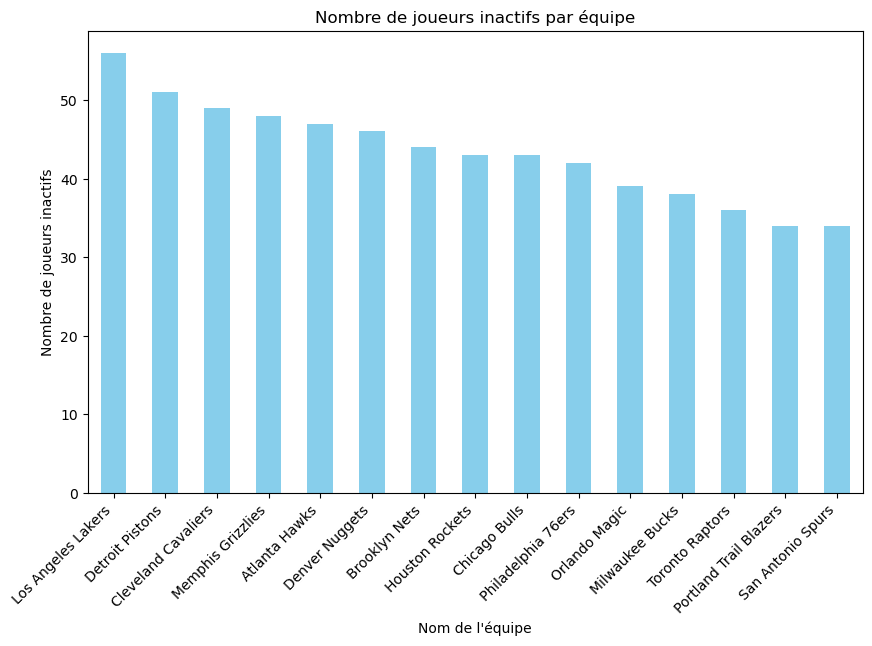

In [22]:

import matplotlib.pyplot as plt


inactive_id = table['inactive_players']['player_id']
cpi = table['common_player_info']
inactive_team_ids = cpi[cpi['person_id'].isin(inactive_id) & cpi['team_id'] != 0]['team_id']
team_counts = inactive_team_ids.value_counts()
team_mapping = table['team'].set_index('id')['full_name']
team_counts.index = team_counts.index.map(team_mapping)
team_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Nombre de joueurs inactifs par équipe')
plt.xlabel('Nom de l\'équipe')
plt.ylabel('Nombre de joueurs inactifs')
plt.xticks(rotation=45, ha='right')  
plt.show()

